In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from typing import Callable
import copy
import numpy as np

## Aplicación del método Vuelos de Lévy en paisajes neutrales de fitness EggHolder

In [2]:
def fill_function(F: Callable, interval: np.ndarray, z_points: np.ndarray, POINTS=50):
    for i, x in enumerate(interval):
        for j, y in enumerate(interval):
            z_points[j, i] = F([interval[i], interval[j]])


In [3]:
def draw_contourf(interval: np.ndarray, z_points: np.ndarray, x_opt: list[float], name: str, POINTS=50):
    plt.contourf(interval, interval, z_points, POINTS)
    plt.title(name)
    plt.plot(*x_opt, 'o', c='yellow')
    plt.text(*x_opt, "Óptimo")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.colorbar()

def draw_space(F: Callable, interval: np.ndarray, z_points: np.ndarray, x_opt: list[float], name: str, view: tuple[float]):
    plt.figure(figsize=(10, 10))
    plt.suptitle(name)
    ax = plt.axes(projection='3d')
    ax.view_init(*view)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.plot_surface(interval, interval.T, z_points.T, edgecolor='none', cmap='bwr')
    ax.scatter(*x_opt, F(x_opt), 'o', c='b')

### Funciones

##### Egg-Holder function
$$f(\mathbf{x})=-\left(x_{2}+47\right) \sin \left(\sqrt{\left|x_{2}+\frac{x_{1}}{2}+47\right|}\right)-x_{1} \sin \left(\sqrt{\left|x_{1}-\left(x_{2}+47\right)\right|}\right)$$

In [4]:
# función 1
F1 = lambda x: -(x[1] + 47) * math.sin(math.sqrt(abs(x[1] + x[0] / 2 + 47))) - x[0] * math.sin(math.sqrt(abs(x[0] - x[1] - 47)))
# dominio
domain_1, n_var_1 = [-512, 512], 2
# optimo
x_opt_1 = [512, 404.2319]
# tamaño del cada gen
GEN_SIZE_1 = 16
# precisión
eps_1 = (domain_1[1] - domain_1[0]) / (2**GEN_SIZE_1 - 1)
# numero de puntos
points_1 = int((domain_1[1] - domain_1[0]) / eps_1) + 1

print(f"Espacio de búsqueda: {points_1}x{points_1}, con una presición de {eps_1:0.6f}")


Espacio de búsqueda: 65536x65536, con una presición de 0.015625


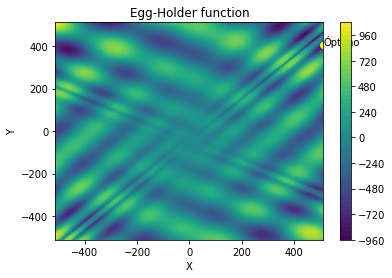

In [5]:
interval_1 = np.linspace(*domain_1, 100)
z_points_1 = np.zeros((100, 100))
fill_function(F1, interval_1, z_points_1)
draw_contourf(interval_1, z_points_1, x_opt_1, "Egg-Holder function")

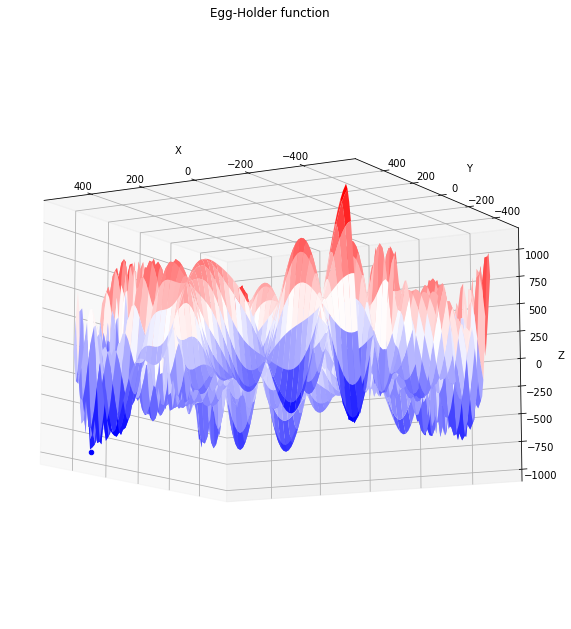

In [6]:
draw_space(F1, interval_1.reshape(-1, 1), z_points_1, x_opt_1, "Egg-Holder function", view=(-10, 120))

##### Lévy function
$$f(x,y)=\sin ^{2}3\pi x+\left(x-1\right)^{2}\left(1+\sin ^{2}3\pi y\right) + {(y-1)}^2(1 + \sin^2{2\pi y})$$

In [7]:
# función 2
F2 = lambda x: math.sin(3 * math.pi * x[0])**2 + (x[0] - 1)**2 * (1 + math.sin(3 * math.pi * x[1])) + (x[1] - 1)**2 * (1 + math.sin(2 * math.pi * x[1])**2)
# dominio
domain_2, n_var_2 = [-10, 10], 2
# optimo
x_opt_2 = [1.0, 1.0]
# tamaño del cada gen
GEN_SIZE_2 = 16
# precisión
eps_2 = (domain_2[1] - domain_2[0]) / (2**GEN_SIZE_2 - 1)
# numero de puntos
points_2 = int((domain_2[1] - domain_2[0]) / eps_2) + 1

print(f"Espacio de búsqueda: {points_2}x{points_2}, con una presición de {eps_2:0.6f}")


Espacio de búsqueda: 65536x65536, con una presición de 0.000305


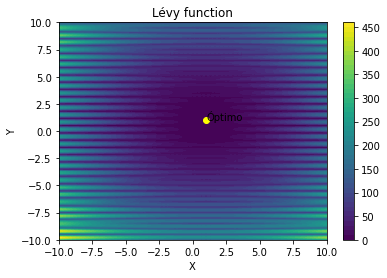

In [8]:
POINTS = 200
interval_2 = np.linspace(*domain_2, POINTS)
z_points_2 = np.zeros((POINTS, POINTS))
fill_function(F2, interval_2, z_points_2)
draw_contourf(interval_2, z_points_2, x_opt_2, "Lévy function")


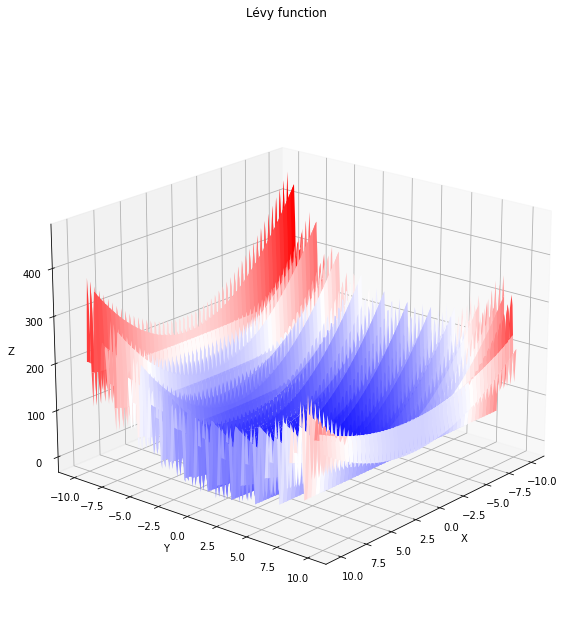

In [9]:
draw_space(F2, interval_2.reshape(-1, 1), z_points_2, x_opt_2, "Lévy function", view=(20, 40))

##### Schaffer's F6 Function 
$$f(x,y)=0.5+{\frac {\sin ^{2}\left(\sqrt{x^{2}+y^{2}}\right)-0.5}{\left[1+0.001\left(x^{2}+y^{2}\right)\right]^{2}}}$$

In [10]:
# función 3
F3 = lambda x: 0.5 + (math.sin(math.sqrt(x[0]**2 + x[1]**2))**2 - 0.5) / (1 + 0.001 * (x[0]**2 + x[1]**2))**2
# dominio
domain_3, n_var_3 = [-10, 10], 2
# optimo
x_opt_3 = [0, 0]
# tamaño del cada gen
GEN_SIZE_3 = 12
# precisión
eps_3 = (domain_3[1] - domain_3[0]) / (2**GEN_SIZE_3 - 1)
# numero de puntos
points_3 = int((domain_3[1] - domain_3[0]) / eps_3) + 1

print(f"Espacio de búsqueda: {points_3}x{points_3}, con una presición de {eps_3:0.6f}")


Espacio de búsqueda: 4096x4096, con una presición de 0.004884


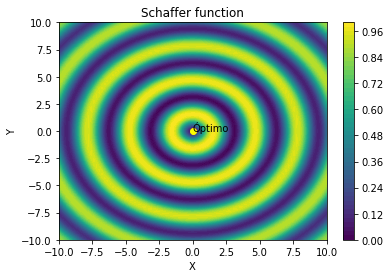

In [11]:
POINTS = 100
interval_3 = np.linspace(*domain_3, POINTS)
z_points_3 = np.zeros((POINTS, POINTS))
fill_function(F3, interval_3, z_points_3)
draw_contourf(interval_3, z_points_3, x_opt_3, "Schaffer function")


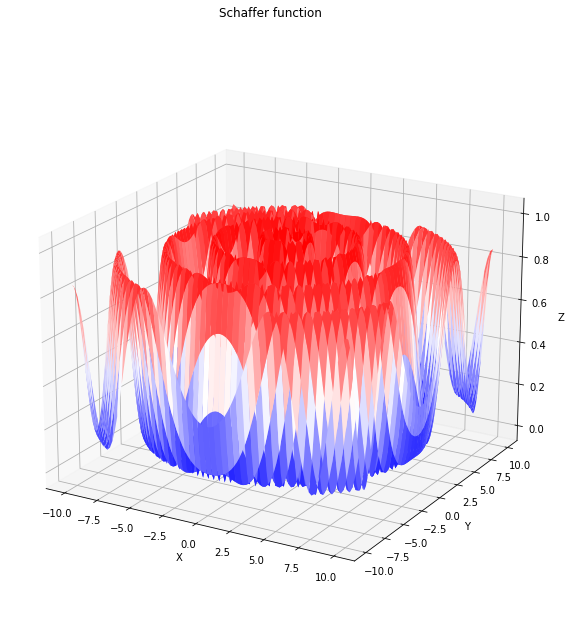

In [12]:
draw_space(F3, interval_3.reshape(-1, 1), z_points_3, x_opt_3, "Schaffer function", view=(20, -60))

### Algoritmos

In [13]:
def net_crawler(s0: np.ndarray, f: Callable, MAX_ITER: int = 50):
    # Input: s0 valor inicial
    p = 0.5
    collect_points = []
    s = np.copy(s0)
    for _ in range(MAX_ITER):
        if p < random.random():
            s = s0 + random.gauss(0, 1)
        if f(s0) <= f(s):
            s0 = np.copy(s)
            collect_points.append(s0)
    return np.array(collect_points)


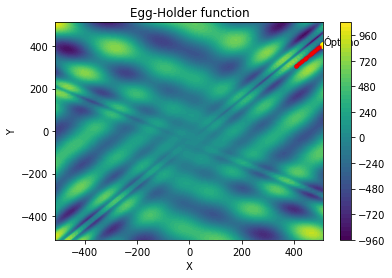

In [14]:
s0 = np.array([500, 400.0])
collected_points = net_crawler(s0, F1, MAX_ITER=1000)
draw_contourf(interval_1, z_points_1, x_opt_1, "Egg-Holder function")
plt.plot(collected_points[:, 0], collected_points[:, 1], '.', c='r', alpha=0.09)


In [15]:
def net_jumper(s0: list[int], f: Callable, MAX_ITER: int = 50):
    for _ in range(MAX_ITER):
        # draw integer d from a power-law distribution, with d <= N
        p = 0.5
        a = 0.5
        d = int(len(s0) * np.random.power(a))
        s = copy.copy(s0)
        for i in range(d):
            if random.random() <= p:
                s[i] = (s[i] + 1) % 2
        if f(s0) <= f(s):
            s0 = np.copy(s)
    return s0


In [16]:
s0 = [1, 0, 1, 0, 1, 1, 0]
net_jumper(s0, F1)

array([0, 0, 0, 1, 0, 1, 0])